In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset from GitHub
url = "https://raw.githubusercontent.com/TopsCode/Data_Analysis_2024/main/ALL_CSV/historical_automobile_sales.csv"
df = pd.read_csv(url)


In [5]:
# Display the first few rows
print(df.head())

        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

In [6]:
"""Q 1: Develop a Line chart using the functionality of pandas to show how
automobile sales fluctuate from year to year. """

# Convert 'Year' to datetime format for better plotting
df["Year"] = pd.to_datetime(df["Year"], format="%Y")


In [7]:
# Group by Year and sum the total sales
sales_by_year = df.groupby("Year")["Automobile_Sales"].sum()

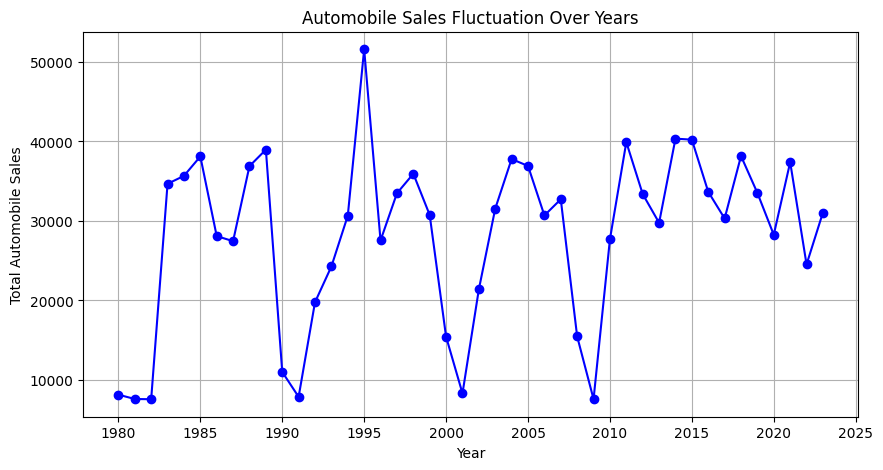

In [8]:
# Plot the line chart
plt.figure(figsize=(10,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Total Automobile Sales")
plt.title("Automobile Sales Fluctuation Over Years")
plt.grid()
plt.show()

In [9]:
""" Q 2: Plot different lines for categories of vehicle type and analyze the trend
to answer the question Is there a noticeable difference in sales trends
between different vehicle types during recession periods? """

# Filter for recession period
df_recession = df[df["Recession"] == 1]

In [10]:
# Pivot table for vehicle sales during recession by year
vehicle_sales_trend = df.pivot_table(index="Year", columns="Vehicle_Type", values="Automobile_Sales", aggfunc="sum")

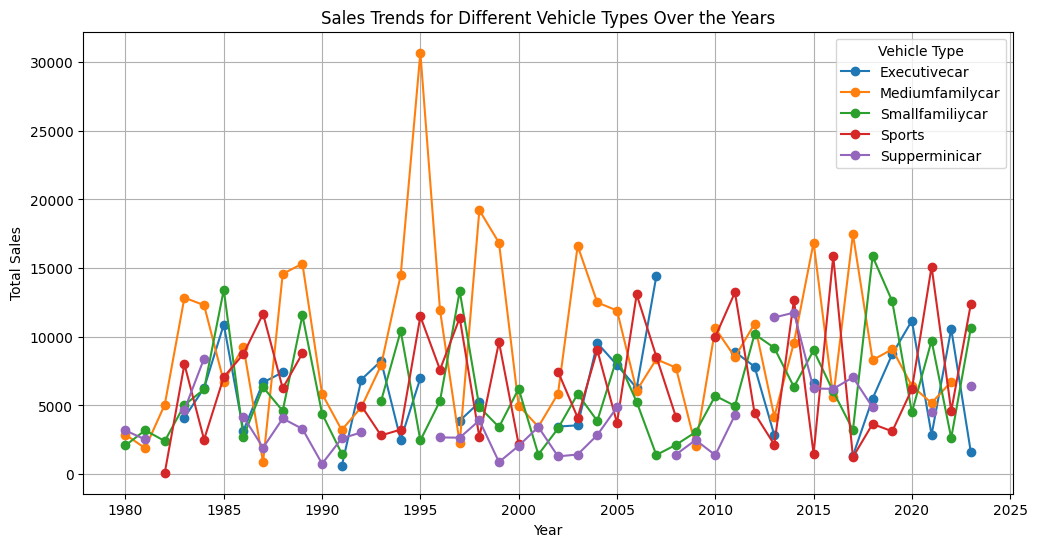

In [11]:
# Plot the trend for different vehicle types
plt.figure(figsize=(12,6))
for col in vehicle_sales_trend.columns:
    plt.plot(vehicle_sales_trend.index, vehicle_sales_trend[col], marker="o", linestyle="-", label=col)

plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Sales Trends for Different Vehicle Types Over the Years")
plt.legend(title="Vehicle Type")
plt.grid()
plt.show()

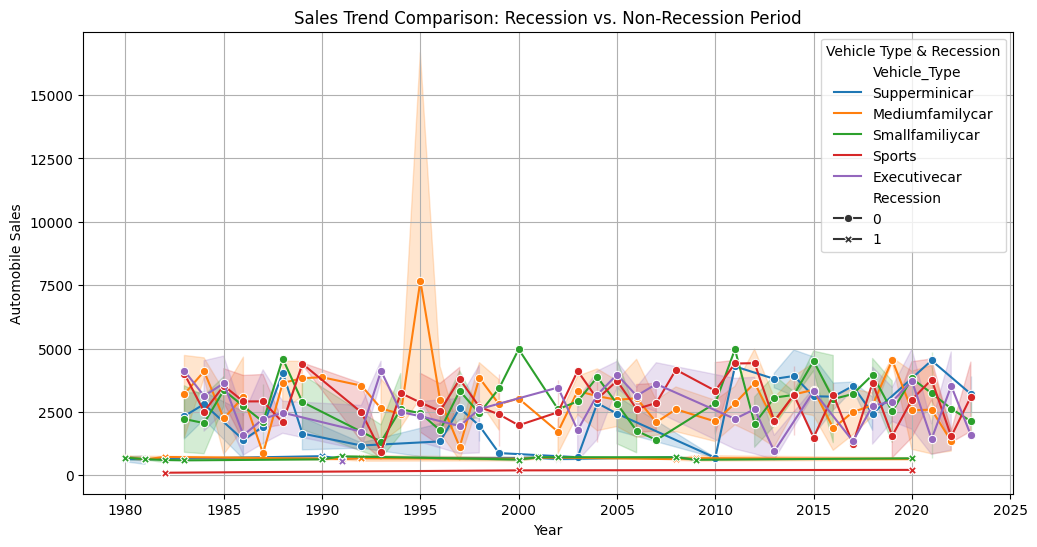

In [12]:
""" Q 3: Use the functionality of Seaborn Library to create a visualization to compare
the sales trend per vehicle type for a recession period with a non- recession
period. """

# Create a line plot using seaborn
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Year", y="Automobile_Sales", hue="Vehicle_Type", style="Recession", markers=True, dashes=False)

plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.title("Sales Trend Comparison: Recession vs. Non-Recession Period")
plt.legend(title="Vehicle Type & Recession")
plt.grid()
plt.show()


In [13]:
""" Q 4: Now you want to compare the sales of different vehicle types
during a recession and a non-recession period """

# Group data by Recession and Vehicle_Type for average sales
avg_sales = df.groupby(["Recession", "Vehicle_Type"])["Automobile_Sales"].mean().reset_index()



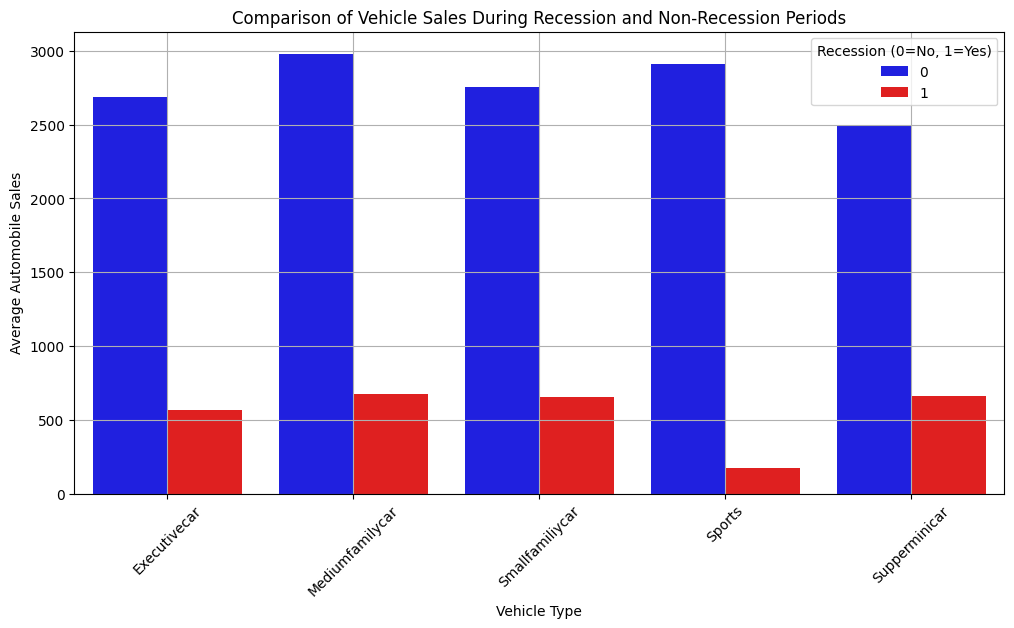

In [17]:
# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=avg_sales, x="Vehicle_Type", y="Automobile_Sales", hue="Recession", palette=["blue", "red"])

# Customize labels and title
plt.xlabel("Vehicle Type")
plt.ylabel("Average Automobile Sales")
plt.title("Comparison of Vehicle Sales During Recession and Non-Recession Periods")
plt.legend(title="Recession (0=No, 1=Yes)")
plt.xticks(rotation=45)
plt.grid()


plt.show()


<ipython-input-16-c324e3b1182d>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Recession (0=No, 1=Yes)")


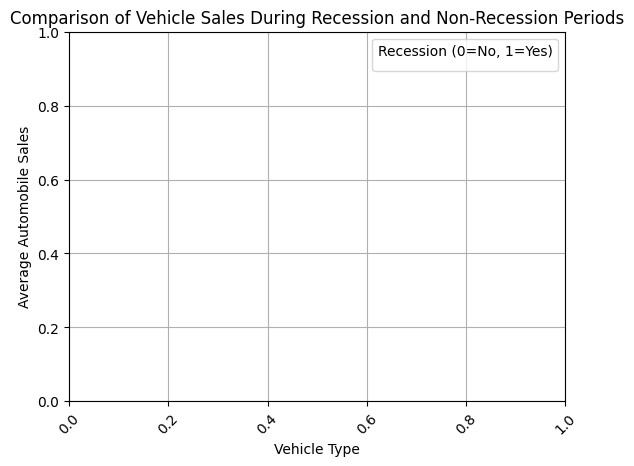